# Partial Regression Plot

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
def multi_corr(y,X):
    """
    Perform a multiple linear regression of y onto X (similar to matlab regress function)
    X   y 
    
    Input:
        X : is a (num observations) by (num variables +1) array.  X should contain a column 
            of ones to generate the intercept.
        y: is a (num observations) array of independent variables
    
    Output:
        r: coef of correlation
        p_value: p value for the full model
    """
    import statsmodels.api as sm
    X = sm.add_constant(X)
    est = sm.OLS(y, X).fit()
    #STATS: the R-square statistic, the F statistic , p value for the full model,
    # and an estimate of the error variance.
    STATS = np.array([est.rsquared , est.fvalue, est.f_pvalue, est.mse_resid])
    r,p_value = STATS[0]**0.5,STATS[2]
    Resid = est.resid
    return r,p_value,Resid

def partial_corr(C,rank=False):
    from scipy.stats import pearsonr, rankdata
    """
    Formally, the partial correlation between X and Y given a set of n controlling variables
    Z = {Z1, Z2, ..., Zn}, is the correlation between the residuals RX and RY resulting from 
    the linear regression of X with Z and of Y with Z,respectively. 
    partial_linear_correlation(pearson on the residuals of data linear regression) : default
    partial_rank_correlation( pearson on the residuals of ranked data linear regression~called spearman 
                                       in matlab function partialcorr) : when rank==True
    """
    N_vars = C.shape[1]
    if rank:
        C1  = rankdata(C[:,0], method='ordinal')
        for k in range(N_vars-1) :
            C1 = np.column_stack((C1, rankdata(C[:,k+1], method='ordinal')))
        C = C1
    partial_corr = np.zeros((N_vars,N_vars))
    pval = np.ones((N_vars,N_vars))*2
    for i in range(N_vars):
        for j in range(i+1):# np.arange(i,N_vars,1):
            index = np.array([True]*N_vars)
            index[i] = False
            index[j] = False          
            var1 =  multi_corr(C[:,i],C[:,index])[2]
            var2 = multi_corr(C[:,j],C[:,index])[2]
            partial_corr[i,j] = pearsonr(var1,var2)[0]
            partial_corr[j,i] = pearsonr(var1,var2)[0]
            pval[j,i]=pearsonr(var1,var2)[1]
            pval[i,j]=pearsonr(var1,var2)[1]
    return  partial_corr,pval 

def multipleLinearRegressionResiduals(C,rank=False):
    from scipy.stats import pearsonr, rankdata

    N_vars = C.shape[1]
    if rank:
        C1  = rankdata(C[:,0], method='ordinal')
        for k in range(N_vars-1) :
            C1 = np.column_stack((C1, rankdata(C[:,k+1], method='ordinal')))
        C = C1
    partial_corr = np.zeros((N_vars,N_vars))
    pval = np.ones((N_vars,N_vars))*2
    res= {}
    for i in range(N_vars):
        res[i]={}
        for j in range(N_vars):
            index = np.array([True]*N_vars)
            index[i] = False
            index[j] = False          
            res1 =  multi_corr(C[:,i],C[:,index])[2]
            res2 = multi_corr(C[:,j],C[:,index])[2]
            res[i][j] = [res1,res2]

    return  res

<Figure size 432x288 with 0 Axes>

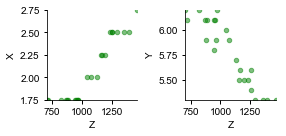

In [39]:
% run figconfig.py
X = np.array([2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75])
Y = np.array([5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1])
Z = np.array([1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719])        
fig,axs = plt.subplots(1,2,figsize=(4,2))
custom_scatterplot(axs[0], Z, X, 0.2, [Z.min(),Z.max()], [X.min(),X.max()], color='green', markerscale=100)
custom_scatterplot(axs[1], Z, Y, 0.2, [Z.min(),Z.max()], [Y.min(),Y.max()], color='green', markerscale=100)

stylize_axes(axs[0], "", "Z", "X", xticks=[], yticks=[], xticklabels=[], yticklabels=[])
stylize_axes(axs[1], "", "Z", "Y", xticks=[], yticks=[], xticklabels=[], yticklabels=[])
plt.tight_layout()


In [40]:
data = np.array([X,Y,Z]).T
res = multipleLinearRegressionResiduals(data)

In [41]:
partial_corr(data)[0]

array([[ 1.        , -0.46025928,  0.56064896],
       [-0.46025928,  1.        , -0.41999707],
       [ 0.56064896, -0.41999707,  1.        ]])

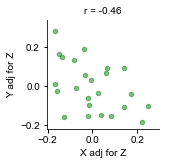

In [59]:
resXadjforZ,resYadjforZ = np.array(res[0][1])
fig,ax = plt.subplots(1,1,figsize=(2,2))
custom_scatterplot(ax, resXadjforZ, resYadjforZ, 0.2, [1.2*resXadjforZ.min(),1.2*resXadjforZ.max()], [1.2*resYadjforZ.min(),1.2*resYadjforZ.max()], color='green', markerscale=100)
r = scipy.stats.pearsonr(resXadjforZ,resYadjforZ)

stylize_axes(ax, "r = "+np.str(np.round(r[0],2)), "X adj for Z", "Y adj for Z", xticks=[], yticks=[], xticklabels=[], yticklabels=[])

